In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.axes import Axes
import os
from datetime import datetime, timezone
from astropy.time import Time, TimezoneInfo
from astropy.table import Table, vstack
from astropy.io import fits
from astropy import units as u, constants as c
import time
import glob
import urllib
from importlib import reload
#import corner

import ML_util as util
import keck_data_compiler as comp

In [4]:
reload(comp)

<module 'keck_data_compiler' from '/u/emily_ramey/work/Keck_Performance/keck_data_compiler.py'>

In [5]:
comp.update()

Previous data backed up as /u/emily_ramey/work/Keck_Performance/data/keck_metadata_backup_20200626.dat
Message: NIRC2 file found: /g/lu/data/gc/lgs_data/06auglgs/clean/kp/
Error: No Strehl file found for epoch 06auglgs. Exiting.
Message: NIRC2 file found: /g/lu/data/gc/lgs_data/07junlgs/clean/kp/
Error: No Strehl file found for epoch 07junlgs. Exiting.
Message: NIRC2 file found: /g/lu/data/gc/lgs_data/08junlgs1/clean/kp/
Error: No Strehl file found for epoch 08junlgs1. Exiting.
Message: NIRC2 file found: /g/lu/data/gc/lgs_data/08junlgs2/clean/kp/
Error: No Strehl file found for epoch 08junlgs2. Exiting.
Message: NIRC2 file found: /g/lu/data/gc/lgs_data/08maylgs2/clean/kp/
Error: No Strehl file found for epoch 08maylgs2. Exiting.
Message: NIRC2 file found: /g/lu/data/gc/lgs_data/09junlgs/clean/kp/
Error: No Strehl file found for epoch 09junlgs. Exiting.
Message: NIRC2 file found: /g/lu/data/gc/lgs_data/10auglgs2/clean/kp/
Error: No Strehl file found for epoch 10auglgs2. Exiting.
Message

In [ ]:
comp.populate_df('17auglgs1')

In [61]:
### Fails because an extra column is added for some weird reason :/, but succeeds with usecols
pd.read_csv('http://mkwc.ifa.hawaii.edu/archive/wx/cfht/cfht-wx.2017.dat',
            delim_whitespace = True, header=None, usecols=range(10))

,0,1,2,3,4,5,6,7,8,9
0,2017,1,1,0,0,29,260.0,-2.77,41,613.0
1,2017,1,1,0,1,33,256.0,-2.79,41,613.0
2,2017,1,1,0,2,30,256.0,-2.78,41,613.0
3,2017,1,1,0,3,27,269.0,-2.77,42,613.0
4,2017,1,1,0,4,30,262.0,-2.77,42,613.0
...,...,...,...,...,...,...,...,...,...,...
522611,2017,12,31,23,55,27,22.0,-0.56,45,617.7
522612,2017,12,31,23,56,28,25.0,-0.57,45,617.7
522613,2017,12,31,23,57,27,20.0,-0.57,45,617.7
522614,2017,12,31,23,58,27,23.0,-0.57,45,617.7


In [54]:
data = pd.read_csv('data/keck_metadata.dat').dropna()
data2 = util.clean(data)

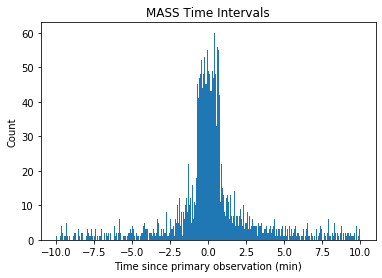

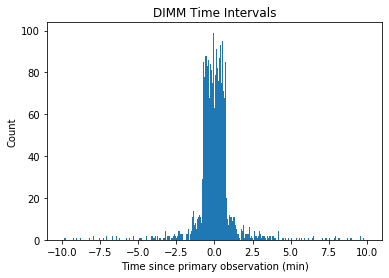

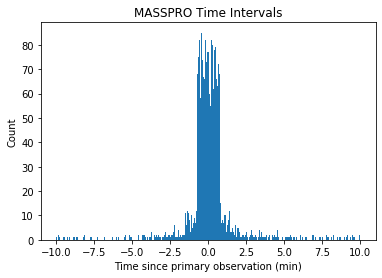

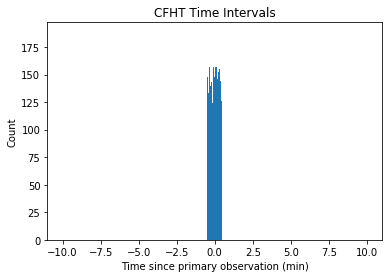

In [45]:
for obs_type in ['mass', 'dimm', 'masspro', 'cfht']:
    dt = (data[obs_type+"_mjd"]-data.mjd)*24*60 # interval in minutes
    plt.hist(dt, bins=400, range=[-10, 10])
    plt.title(obs_type.upper()+" Time Intervals")
    plt.xlabel("Time since primary observation (min)")
    plt.ylabel("Count")
    plt.show()

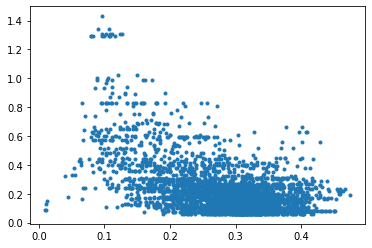

In [59]:
# LBFWHM vs MASSS
plt.plot(data2['strehl'], data2.mass, '.')

In [4]:
data_dir = "data/"
steve_file = data_dir+"lgs_metadata.fits"
plot_dir = "plots/steve_plots/"

In [3]:
data = Table.read(steve_file, format='fits')
steve_data = data.to_pandas()

steve_clean = util.clean(steve_data)

In [4]:
# one second in units of days
dec_sec = 1/(24*60*60.0)

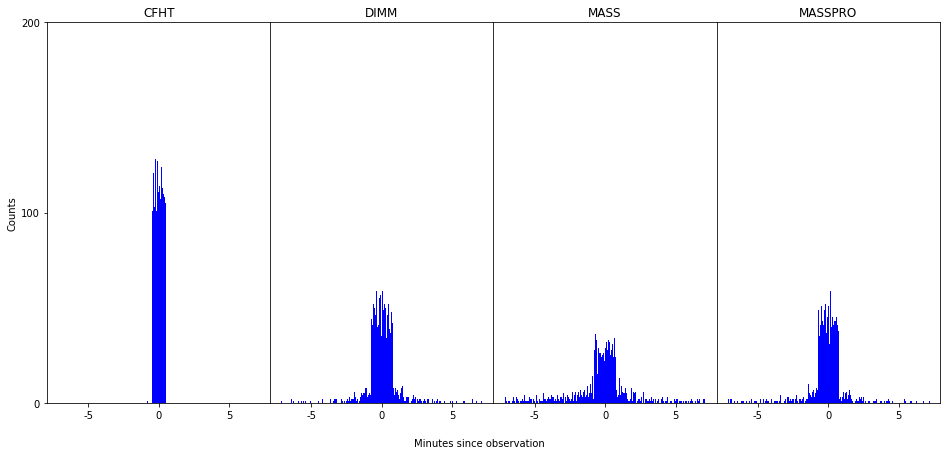

In [6]:
### Plot time interval between weather/seeing and image readings
dt_cols = ['cfht_delta_t', 'DIMM_delta_t', 
           'MASS_delta_t', 'MASSPRO_delta_t']
dt_labels = ['CFHT', 'DIMM', 'MASS', 'MASSPRO']

xrange = (-0.005, 0.005)
nbins = 400

fig, ax = plt.subplots(1, 4, figsize=[16,7])
plt.subplots_adjust(wspace = 0)
fig.text(0.5, 0.04, 'Minutes since observation', ha='center')

for i,col in enumerate(dt_cols):
    ax[i].hist(steve_clean[col], range=xrange, bins=nbins,
               label=dt_labels[i], color='b')
    ax[i].locator_params(axis='y', nbins=2)
    ax[i].set_title(dt_labels[i])
    ax[i].set_ylim([0, 200])
    _ = ax[i].set_yticks([]) if i!=0 else ax[i].set_ylabel("Counts")
    
    # TODO: take out hard-coded values
    ax[i].set_xticks([-0.00347222,0,0.00347222])
    ax[i].set_xticklabels(['-5', '0', '5'])


plt.show()

In [7]:
### We're not using the plot of different time intervals

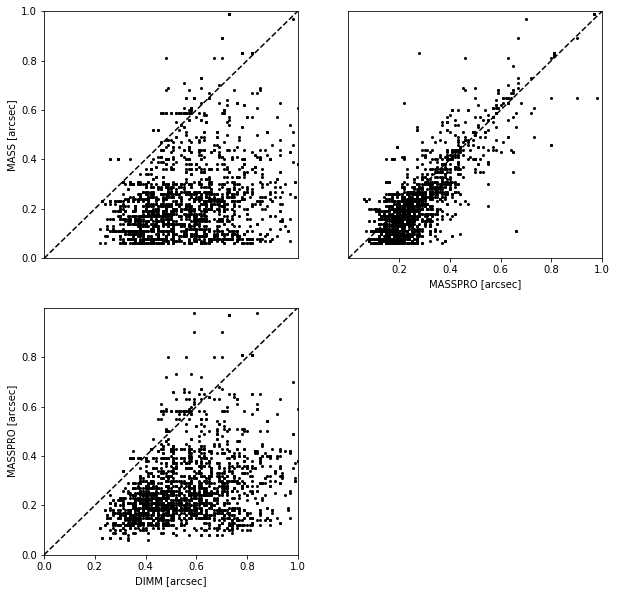

In [9]:
### Comparing seeing parameters
fig, ax = plt.subplots(2, 2, figsize=(10,10))
model = np.linspace(0, 1, 100)

ax1 = ax[0,0]
ax2 = ax[0,1]
ax3 = ax[1,0]
ax4 = ax[1,1].axis('off')

# TODO: Un-hardcode this

# Uncommenting the additional ax.scatter calls below will colorize based on delta t
ax1.scatter(steve_clean['DIMM'], steve_clean['MASS'], s = 4, c = 'k')
# ax1.scatter(df['DIMM'], df['MASS'], s = 4, c = np.abs(df['DIMM_mjd'] - df['MASS_mjd']), cmap = 'viridis_r')
ax1.plot(model, model, color = 'k', linestyle = '--')
ax1.set_xlim(0,1)
ax1.set_ylim(0,1)
ax1.set_xticks([])
ax1.set_ylabel('MASS [arcsec]')

ax2.scatter(steve_clean['MASSPRO'], steve_clean['MASS'], s = 4, c = 'k')
# ax2.scatter(df['MASSPRO'], df['MASS'], s = 4, c = np.abs(df['MASSPRO_mjd'] - df['MASS_mjd']), cmap = 'viridis_r')
ax2.plot(model, model, color = 'k', linestyle = '--')
ax2.set_xlabel('MASSPRO [arcsec]')
ax2.set_yticks([])
ax2.set_xticks([0.2,0.4,0.6,0.8,1])
ax2.set_xlim(0,1)
ax2.set_ylim(0,1)

ax3.scatter(steve_clean['DIMM'], steve_clean['MASSPRO'], s = 4, c = 'k')
# ax3.scatter(df['DIMM'], df['MASSPRO'], s = 4, c = np.abs(df['DIMM_mjd'] - df['MASSPRO_mjd']), cmap = 'viridis_r')
ax3.plot(model, model, color = 'k', linestyle = '--')
ax3.set_ylabel('MASSPRO [arcsec]')
ax3.set_yticks([0,0.2,0.4,0.6,0.8])
ax3.set_xlim(0,1)
ax3.set_ylim(0,1)
ax3.set_xlabel('DIMM [arcsec]')

#plt.savefig('seeing.pdf', format = 'pdf')
plt.show()

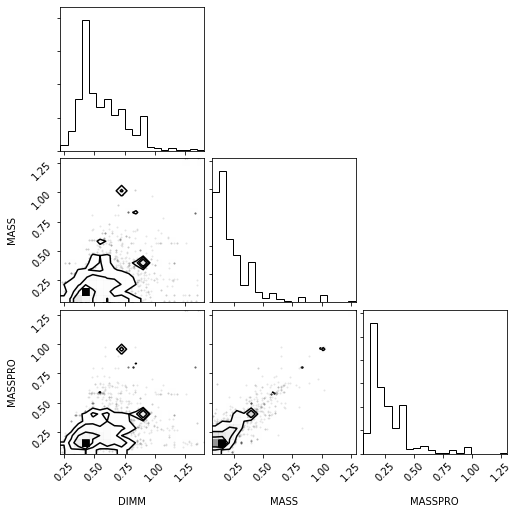

In [22]:
### Another way to display the seeing data
seeing = ['DIMM', 'MASS', 'MASSPRO']
test = steve_clean[seeing]
_ = corner.corner(test, labels=seeing)

In [24]:
### Kolmogorov Turbulence section: where does this come from??? 
# /Users/stevenrobinson/Desktop/SCHOOL/Research/Code/Weather_Data/20100706.dimm.dat
# No comments or axis labels or units :/
# not sure what this is meant to be
# Seems to be making a power spectrum of DIMM measurements?
# Turbulence frequency? Does this have significance?
# Could include in our measurements if this is useful

In [36]:
### Seeing vs. FWHM
mass_pro = ['MASSPRO_half'] + ["MASSPRO_"+str(x) 
                               for x in 2**np.arange(1, 5)] # labels
alts = [x for x in 2.0**np.arange(-1, 5)] # altitude in km

c = steve_clean['wind_speed'] # in m/s
# This is a really confusing plot and I have no idea what he's trying
# to show
# TODO: ask Jessica

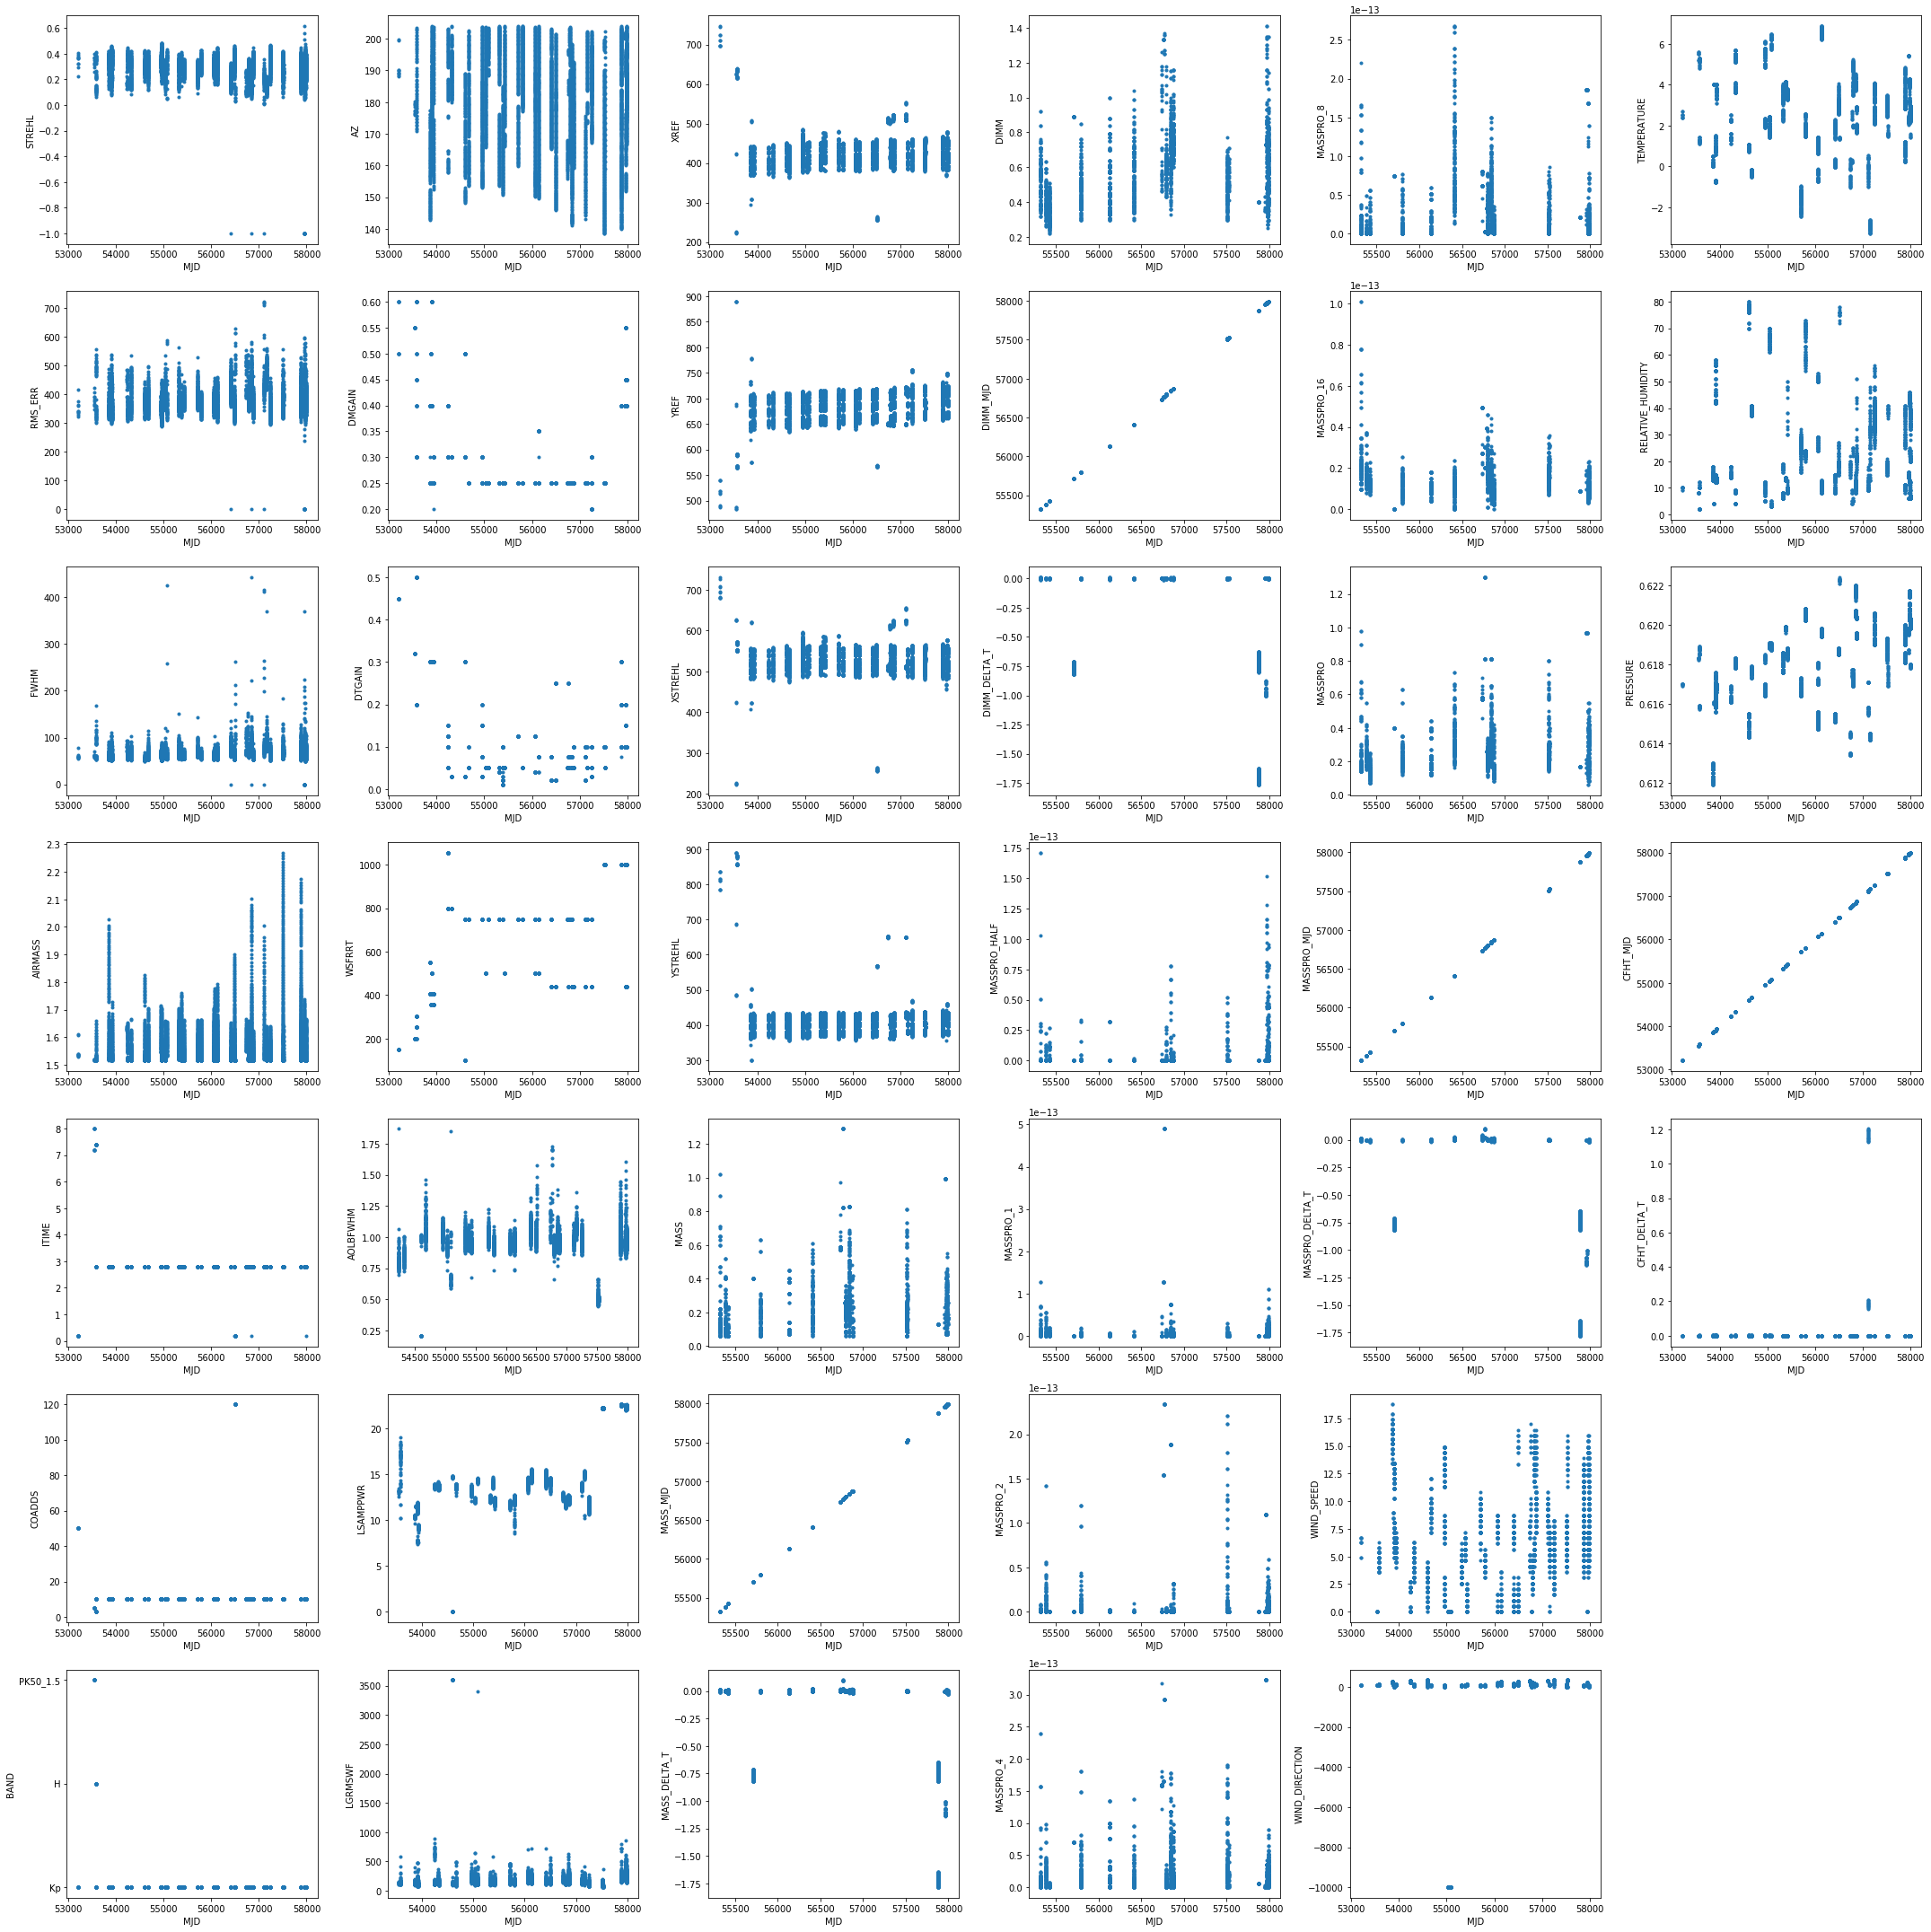

In [76]:
### Plot everything with mjd
steve_vars = steve_data.drop(
    columns=['file', 'epoch', 'wind_speed[kts]', 'pressure[mb]', 'mjd'])

ncols = 6
nrows = int(len(steve_vars.columns)/ncols)

if nrows != len(steve_vars.columns)/ncols: # check for overflow
    nrows+=1

overflow = len(steve_vars.columns) % nrows

fig, axes = plt.subplots(nrows, ncols, figsize=(30, 30))
if overflow: # take out extra plots
    for i in range(overflow, nrows):
        axes[i, ncols-1].axis('off')

colnum = 0
rownum = 0
for i,col in enumerate(steve_vars.columns):
    if rownum >= nrows:
        rownum = 0
        colnum+=1  
    ax = axes[rownum, colnum]
    ax.plot(steve_data['mjd'], steve_vars[col], '.')
    ax.set_xlabel("MJD")
    ax.set_ylabel(col.upper())
    #ax.set_yticks([])
    
    rownum+=1

plt.tight_layout()
plt.savefig(plot_dir+"param_dates.png", bbox_inches='tight')

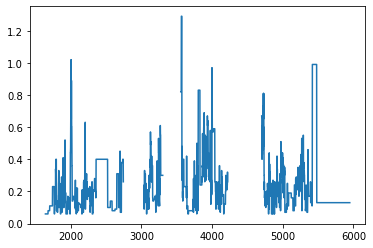

In [82]:
plt.plot(steve_data.MASS)

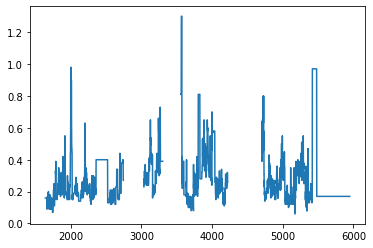

In [81]:
plt.plot(steve_data.MASSPRO)

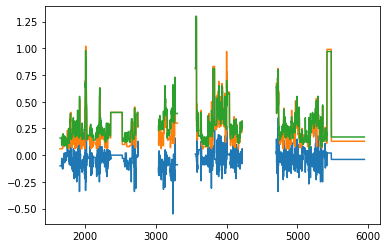

In [86]:
plt.plot(steve_data.MASS-steve_data.MASSPRO)
plt.plot(steve_data.MASS)
plt.plot(steve_data.MASSPRO)